In [1]:
# Importing important library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing data from device
df=pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Sibsp is for siblings and Parch is for parents

In [4]:
print('no. of passenger:'+str(len(df.index)))

no. of passenger:891


In [5]:
# 891 passengers were travelling in titanic

# Analyzing the data

<AxesSubplot:xlabel='Survived', ylabel='count'>

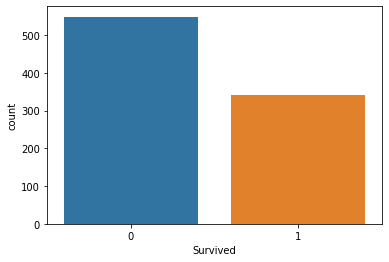

In [6]:
#countplot
sns.countplot(x="Survived",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

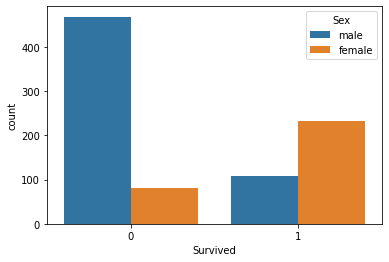

In [7]:
sns.countplot(x="Survived",hue="Sex",data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

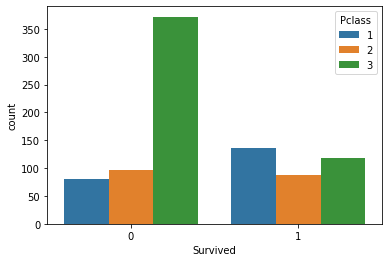

In [8]:
sns.countplot(x="Survived",hue="Pclass",data=df)

<AxesSubplot:ylabel='Frequency'>

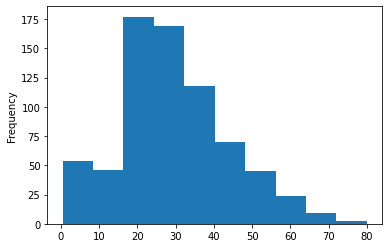

In [9]:
#checking age distribution
df['Age'].plot.hist()

<AxesSubplot:ylabel='Frequency'>

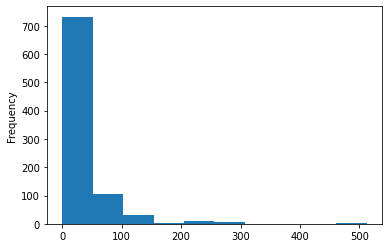

In [10]:
#checking fare distribution
df['Fare'].plot.hist()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

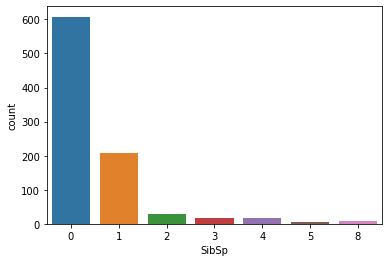

In [14]:
#couting sibling or spouse
sns.countplot(x='SibSp',data=df)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# data wrangling

In [16]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
#dropping Cabin column
df.drop('Cabin',axis=1,inplace=True)

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
#dropping null values
df.dropna(inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
#getting dummy values for sex
sex=pd.get_dummies(df['Sex'],drop_first=True) #only male column will be enough
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [26]:
#getting dummy values for embark
embrk=pd.get_dummies(df['Embarked'])
embrk.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [28]:
#getting dummy values for Pclass
pclss=pd.get_dummies(df['Pclass'])
pclss.head()

,1,2,3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [30]:
df=pd.concat([df,sex,embrk,pclss],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,C,Q,S,1,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,0,1,0,0,1


In [31]:
#dropping the unneccesary column
df.drop(['Sex','Pclass','Embarked','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [32]:
df.head()

,Survived,Age,SibSp,Parch,Fare,male,C,Q,S,1,2,3
0,0,22.0,1,0,7.2500,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,1,0,0,1,0,0,1


## Train And Test

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [39]:
X=df.drop(['Survived'],axis=1)
y=df['Survived']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [42]:
logistic=LogisticRegression()
logistic.fit(X_train,y_train)
prediction=logistic.predict(X_test)
print(prediction)

[0 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1
 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0
 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0]


C:\Users\Rahul\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\Rahul\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Rahul\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got featu

In [43]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [46]:
#accuracy score
acc=accuracy_score(y_test,prediction)
acc

0.8202247191011236

In [49]:
#classification report
clss=classification_report(y_test,prediction)
clss

'              precision    recall  f1-score   support\n\n           0       0.85      0.87      0.86       114\n           1       0.76      0.73      0.75        64\n\n    accuracy                           0.82       178\n   macro avg       0.81      0.80      0.80       178\nweighted avg       0.82      0.82      0.82       178\n'

In [51]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cnfmtrx=confusion_matrix(y_test,prediction)
cnfmtrx

array([[99, 15],
       [17, 47]], dtype=int64)

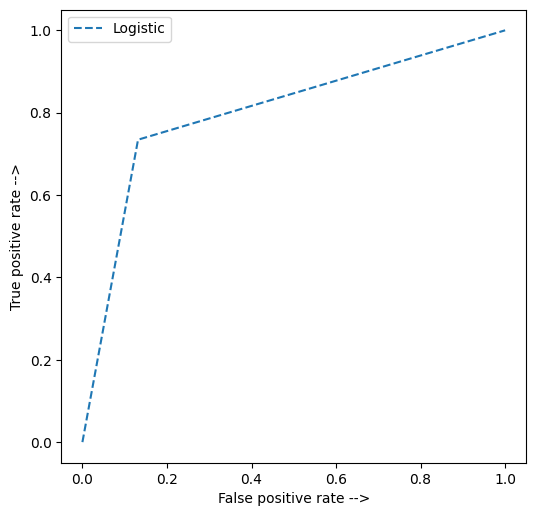

In [52]:
#plotting the roc_auc curve
from sklearn.metrics import roc_curve
#creating fpr and tpr split
logistic_fpr,logistic_tpr,thresholds=roc_curve(y_test,prediction)

#plotting
plt.figure(figsize=(6,6),dpi=100)
plt.plot(logistic_fpr,logistic_tpr,linestyle='--',label='Logistic')
plt.xlabel('False positive rate -->')
plt.ylabel('True positive rate -->')

plt.legend()
plt.show()